<a href="https://colab.research.google.com/github/gangasani-anusha/DeepLearning-Assignment3/blob/main/DeepLearning_BackPropagation_%26_GradientPropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Creating Environment`

In [ ]:
!pip install pytorch-lightning

In [2]:
!python --version

Python 3.7.12


In [3]:
!pip list | grep tensor

tensorboard                   2.8.0
tensorboard-data-server       0.6.1
tensorboard-plugin-wit        1.8.1
tensorflow                    2.8.0
tensorflow-datasets           4.0.1
tensorflow-estimator          2.8.0
tensorflow-gcs-config         2.8.0
tensorflow-hub                0.12.0
tensorflow-io-gcs-filesystem  0.24.0
tensorflow-metadata           1.7.0
tensorflow-probability        0.16.0


In [4]:
!pip list | grep torch

pytorch-lightning             1.5.10
torch                         1.10.0+cu111
torchaudio                    0.10.0+cu111
torchmetrics                  0.7.2
torchsummary                  1.5.1
torchtext                     0.11.0
torchvision                   0.11.1+cu111


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pytorch_lightning as pl
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from typing import Callable

### `Linear Regression & MSE`

x: (25, 1), weights: (1, 1), bias: (1,), y: (25, 1)


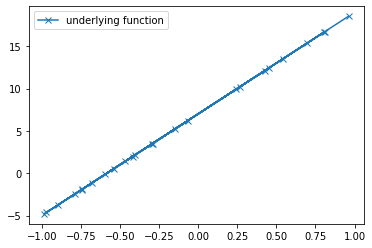

In [21]:
n = 25
d = 1
x = np.random.uniform(-1, 1, (n, d))
# y = 5x + 10
true_weights = np.array([[12],])
true_bias = np.array([7])

y_true = x @ true_weights + true_bias
print(f'x: {x.shape}, weights: {true_weights.shape}, bias: {true_bias.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

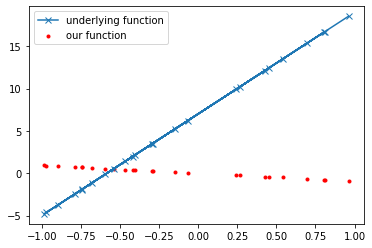

In [22]:
class Linear:
  def __init__(self, input_dim, num_hidden=1):
    self.wt = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.wt + self.bias

ln = Linear(d)
y_pred = ln(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

In [23]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 86.88780972984316


### `Back Propagation`

In [9]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.wt = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.wt + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.wt.T
    return self.x_gradient

  def update(self, lr):
    self.wt = self.wt - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [15]:
loss = MSE()
ln = Linear(d)
y_pred = ln(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
ln.backward(loss_gradient)
ln.update(0.5)
y_pred = ln(x)
print(loss(y_pred, y_true))

105.55578071357145
2.807901504652496


### `Gradient Descent`


Epoch 0, loss 110.03554507833124
Epoch 5, loss 16.204101134973502
Epoch 10, loss 4.019268986084562


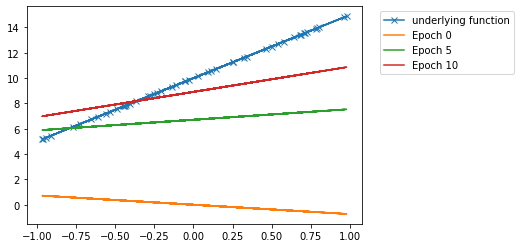

In [14]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
ln = Linear(d)

num_epochs = 15
lr = 0.1

for epoch in range(num_epochs):
  y_pred = ln(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  ln.backward(gradient_from_loss)
  ln.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");